In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from unconstrained_model import integrate
from unconstrained_model import data_generator
from unconstrained_model import posterior

# TESTING THE FUNCTIONAL ACTUAL BETA

In [2]:
# fixed input

n = 100
sigma = 1

def covariates_kernel(s,t):
    return np.exp(-2*(t-s)**2)
def prior_kernel(s,t):
    return np.exp(-(t-s)**2)

a = -3
b = 3
g = 40

T = np.linspace(a,b,g)

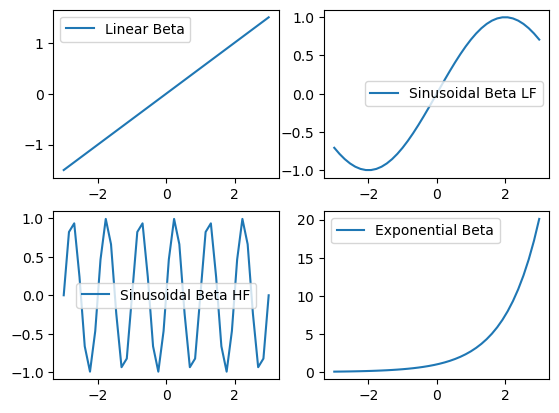

In [3]:
# testing input

beta1 = 0.5*T
beta2 = np.sin((np.pi/4)*T)
beta3 = np.sin((2*np.pi)*T)
beta4 = np.exp(T)

fig,axs = plt.subplots(2,2)
axs[0,0].plot(np.linspace(a,b,g),beta1,label='Linear Beta')
axs[0,1].plot(np.linspace(a,b,g),beta2,label='Sinusoidal Beta LF')
axs[1,0].plot(np.linspace(a,b,g),beta3,label='Sinusoidal Beta HF')
axs[1,1].plot(np.linspace(a,b,g),beta4,label='Exponential Beta')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

In [4]:
#generation

betas = [beta1, beta2, beta3, beta4]
data = {}

for i in range(len(betas)):
    idx = str(i+1)
    data[idx] = data_generator(b,a,g,betas[i],n,covariates_kernel, sigma).i_o()

In [5]:
#fitted value

p = {}

for i in data.keys():
    x ,y = data[i]
    p[i] = posterior(T,x,y,prior_kernel,sigma).fitted_values()

Text(0.5, 0.98, 'Smoother Betas = Better Fit')

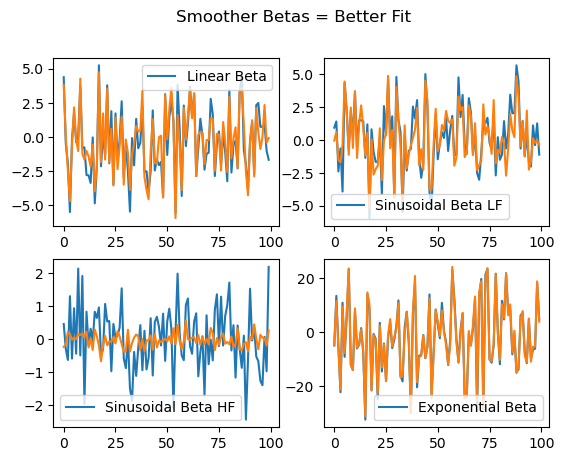

In [6]:
#actual vs fitted

fig,axs = plt.subplots(2,2)
axs[0,0].plot(data['1'][1],label='Linear Beta')
axs[0,0].plot(p['1'])
axs[0,1].plot(data['2'][1],label='Sinusoidal Beta LF')
axs[0,1].plot(p['2'])
axs[1,0].plot(data['3'][1],label='Sinusoidal Beta HF')
axs[1,0].plot(p['3'])
axs[1,1].plot(data['4'][1],label='Exponential Beta')
axs[1,1].plot(p['4'])

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

fig.suptitle('Smoother Betas = Better Fit')

# TESTING THE PRIOR KERNEL

In [7]:
# fixed input

a = -3
b = 3
g = 40
T = np.linspace(a,b,g)
sigma = 1
beta = np.sin((np.pi/4)*T)
n = 100

def covariates_kernel(s,t):
    return np.exp(-2*(t-s)**2)

x,y = data_generator(b,a,g,beta,n,covariates_kernel, sigma).i_o()

In [8]:
# testing input

def gaussian1(s,t):
    return np.exp(-(t-s)**2)
def gaussian2(s,t):
    return np.exp(-((t-s)/2)**2)
def WN(s,t):
    return s==t
def poly(s,t):
    return s*t+1

kernels = [gaussian1, gaussian2, WN, poly]

In [9]:
#fitted value

p = {}

for i in range(len(kernels)):
    idx = str(i+1)
    p[idx] = posterior(T,x,y,kernels[i],sigma).fitted_values()

Text(0.5, 0.98, 'Those Kernels are kind of Equivalent...')

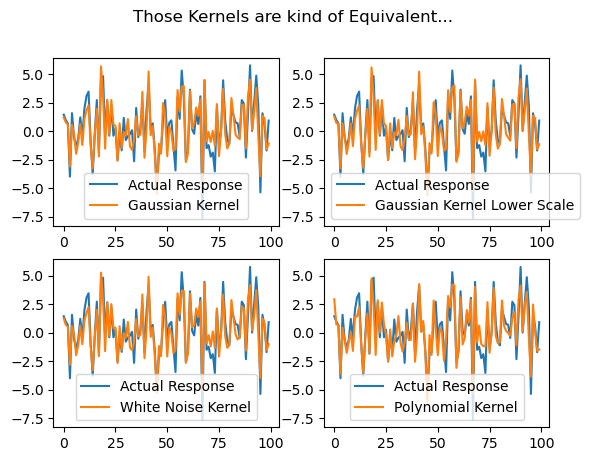

In [10]:
#actual vs fitted

fig,axs = plt.subplots(2,2)
axs[0,0].plot(y,label='Actual Response')
axs[0,0].plot(p['1'],label='Gaussian Kernel')
axs[0,1].plot(y,label='Actual Response')
axs[0,1].plot(p['2'],label='Gaussian Kernel Lower Scale')
axs[1,0].plot(y,label='Actual Response')
axs[1,0].plot(p['3'],label='White Noise Kernel')
axs[1,1].plot(y,label='Actual Response')
axs[1,1].plot(p['4'],label='Polynomial Kernel')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

fig.suptitle('Those Kernels are kind of Equivalent...')

# TRIAL AND TESTING WITH NON-SMOOTH ACTUAL BETA

## TRIAL WITH A DIFFERENT SIGMA

In [11]:
# fixed input

a = -3
b = 3
g = 20
T = np.linspace(a,b,g)
sigmas = np.arange(21,31,step=3)
beta = np.sin((2*np.pi)*T)
n = 100

def prior_kernel(s,t):
    return np.exp(-(t-s)**2)

def cov_kernel(s,t):
    return np.exp(-(t-s)**2)

In [12]:
#generation

data = {}

for i in range(len(sigmas)):
    idx = str(i+1)
    data[idx] = data_generator(b,a,g,beta,n,cov_kernel, sigmas[i]).i_o()

In [13]:
#fitted value

p = []

for i in range(len(data.keys())):
    x ,y = data[str(i+1)]
    pred_y = posterior(T,x,y,prior_kernel,sigmas[i]).fitted_values()
    p.append(pred_y)

In [14]:
sigmas

array([21, 24, 27, 30])

Text(0.5, 0.98, 'Even if we increase a lot sigma it does not change')

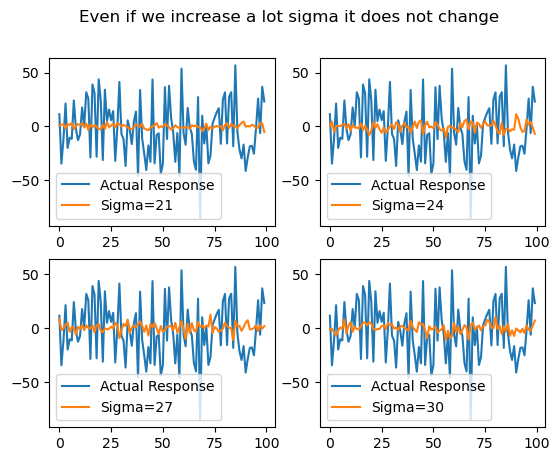

In [15]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(y,label='Actual Response')
axs[0,0].plot(p[0],label='Sigma=21')
axs[0,1].plot(y,label='Actual Response')
axs[0,1].plot(p[1],label='Sigma=24')
axs[1,0].plot(y,label='Actual Response')
axs[1,0].plot(p[2],label='Sigma=27')
axs[1,1].plot(y,label='Actual Response')
axs[1,1].plot(p[3],label='Sigma=30')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

fig.suptitle('Even if we increase a lot sigma it does not change')